# Artificial lattices

__Exercise 1:__

Compute the acoustic eigenvalues and eigenfunctions for an approximation of a cross section of a 1D chain of acoustic cavitities coupled by narrow channels. Indicate the respective frequencies assuming the usual air sound velocity.

In [36]:
raio = 1.;
espessura = .4;

altura = 4;
largura = 2 raio;

separacao = 1;
sites = 12;

First we need to make our lattice, we will use the Graphics function to build it.

We will start with the build up of the cavities

-Graphics-
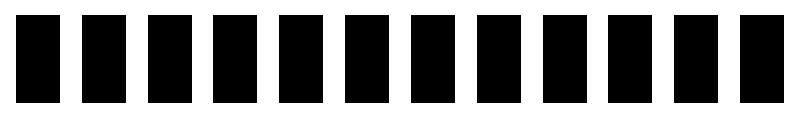

In [42]:
Show[
  Table[Graphics[{Black, 
     Rectangle[{i, 0} + {-largura/2, -altura/2}, {i, 0} + {largura/2, 
        altura/2}]}], {i, 0, (sites - 1)*(separacao+2*raio), (separacao+2*raio)}], ImageSize -> 600]

Now the channels

-Graphics-
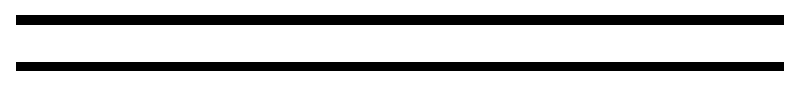

In [43]:
Show[
  Table[
    Graphics[{Black, 
      Rectangle[{i, 0} + {0, -espessura/2 + altura/4}, {i, 
         0} + {(separacao+2*raio), espessura/2 + altura/4}]}], {i, 
    0, (sites - 2)*(separacao+2*raio), (separacao+2*raio)}],
  Table[
    Graphics[{Black, 
      Rectangle[{i, 0} + {0, -espessura/2 - altura/4}, {i,
         0} + {(separacao+2*raio), espessura/2 - altura/4}]}], {i,
    0, (sites - 2)*(separacao+2*raio), (separacao+2*raio)}], ImageSize -> 600]

Now join them together

-Graphics-
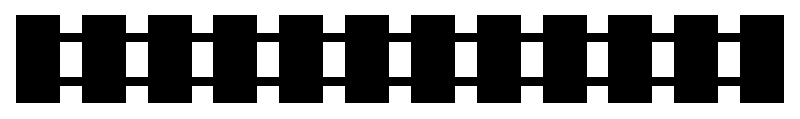

In [44]:
boundary=Show[
  Table[Graphics[{Black, 
     Rectangle[{i, 0} + {-largura/2, -altura/2}, {i, 0} + {largura/2, 
        altura/2}]}], {i, 0, (sites - 1)*(separacao+2*raio), (separacao+2*raio)}], 
  Table[
    Graphics[{Black, 
      Rectangle[{i, 0} + {0, -espessura/2 + altura/4}, {i, 
         0} + {(separacao+2*raio), espessura/2 + altura/4}]}], {i, 
    0, (sites - 2)*(separacao+2*raio), (separacao+2*raio)}],
  Table[
    Graphics[{Black, 
      Rectangle[{i, 0} + {0, -espessura/2 - altura/4}, {i,
         0} + {(separacao+2*raio), espessura/2 - altura/4}]}], {i,
    0, (sites - 2)*(separacao+2*raio), (separacao+2*raio)}], ImageSize -> 600]

Now lets turn this figure into a matrix and check its eigenvalues 

In [45]:
bdr = BoundaryDiscretizeGraphics[boundary, 
  MaxCellMeasure -> {"Area" -> 0.01}, AccuracyGoal -> 20, 
  PrecisionGoal -> 20, 
  MeshCellStyle -> {{1, All} -> Red, {0, All} -> Black}, 
  ImageSize -> 1000];

In [46]:
{vals, funs} = 
  NDEigensystem[{-Laplacian[u[x, y], {x, y}], 
    DirichletCondition[u[x, y] == 0, True]}, 
   u[x, y], {x, y} \[Element] bdr, sites-2, 
   Method -> {"PDEDiscretization" -> {"FiniteElement", 
       "MeshOptions" -> {"MaxCellMeasure" -> 0.01}}}];


-Graphics-
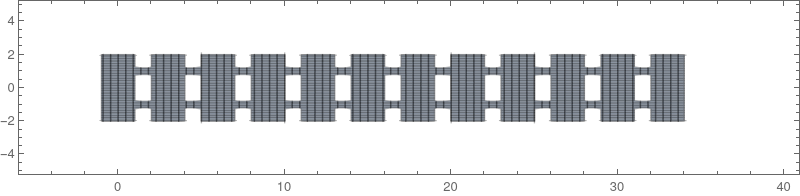

In [47]:
RegionPlot[{x, y} \[Element] bdr, {x, -5, 40}, {y, -5, 5}, 
 PlotPoints -> 100, Mesh -> All, MaxRecursion -> 0, 
 AspectRatio -> Automatic,ImageSize->600]

-Graphics-
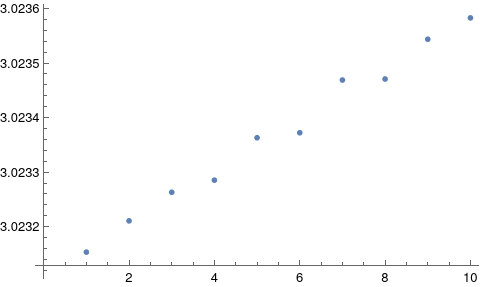

In [48]:
vals;
ListPlot[vals]

{-Graphics3D-, -Graphics3D-, -Graphics3D-, -Graphics3D-, -Graphics3D-, -Graphics3D-, 
 
>   -Graphics3D-, -Graphics3D-, -Graphics3D-, -Graphics3D-}
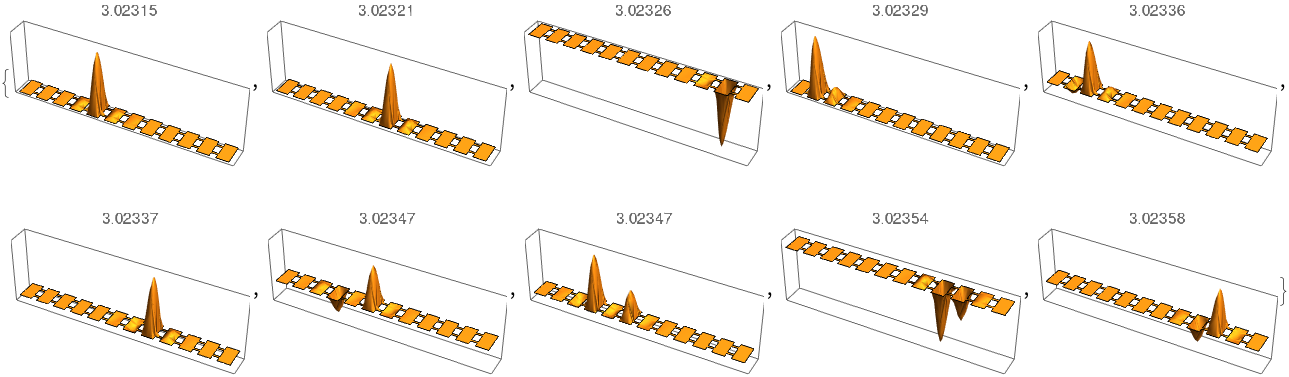

In [50]:
Table[Plot3D[funs[[i]], {x, y} \[Element] bdr, PlotRange -> All, 
  PlotLabel -> vals[[i]], PlotTheme -> "Minimal", 
  BoxRatios -> {10, 1, 3}], {i, Length[vals]}]

{harmonico  1, energy= 3.02315, -Graphics-}
{harmonico  2, energy= 3.02321, -Graphics-}
{harmonico  3, energy= 3.02326, -Graphics-}
{harmonico  4, energy= 3.02329, -Graphics-}
{harmonico  5, energy= 3.02336, -Graphics-}
{harmonico  6, energy= 3.02337, -Graphics-}
{harmonico  7, energy= 3.02347, -Graphics-}
{harmonico  8, energy= 3.02347, -Graphics-}
{harmonico  9, energy= 3.02354, -Graphics-}
{harmonico  10, energy= 3.02358, -Graphics-}
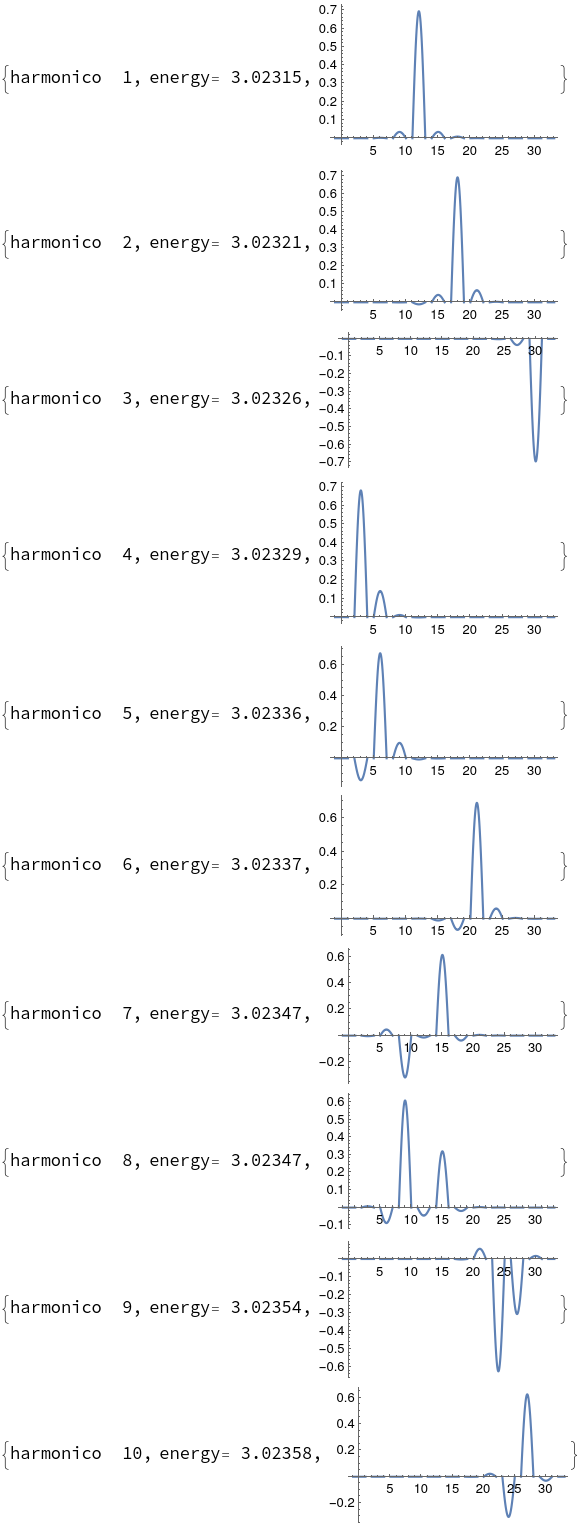

In [51]:
Column[{Table["harmonico  "<> ToString[i],{i,1,Length[vals]}],
Table["energy= "<> ToString[vals[[i]]],{i,1,Length[vals]}],
Table[
Plot[funs[[i]]/.{x->xvalue,y->0},
{xvalue,-raio,(sites-1)*(separacao+2*raio)},PlotRange->All],{i,1,Length[vals]}]}//Transpose]

__Exercise 2:__

Apply the previous analysis to the acoustic version of the SSH model.
Discuss in particular the existence of edge states.

Compare with the results in Anselmo's seminar:

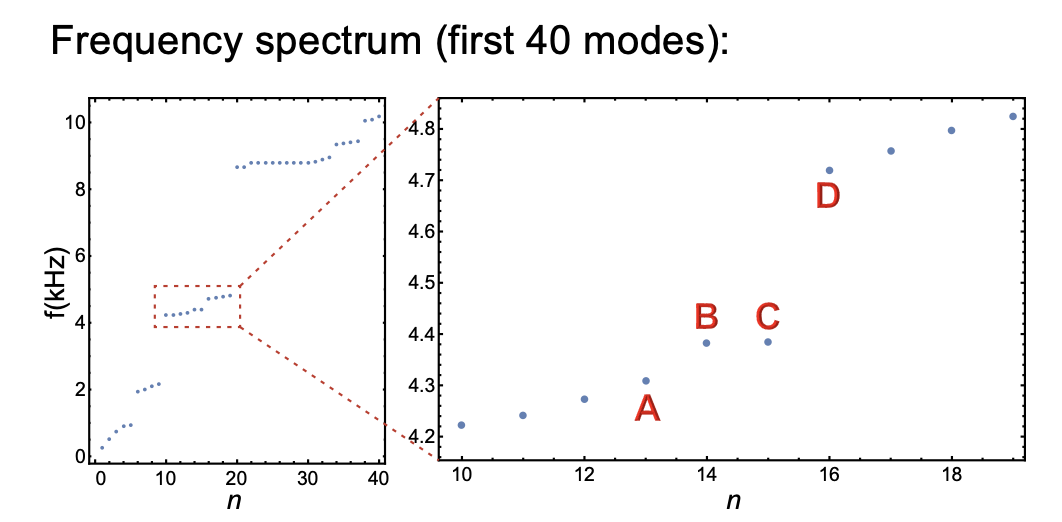

for the lattice

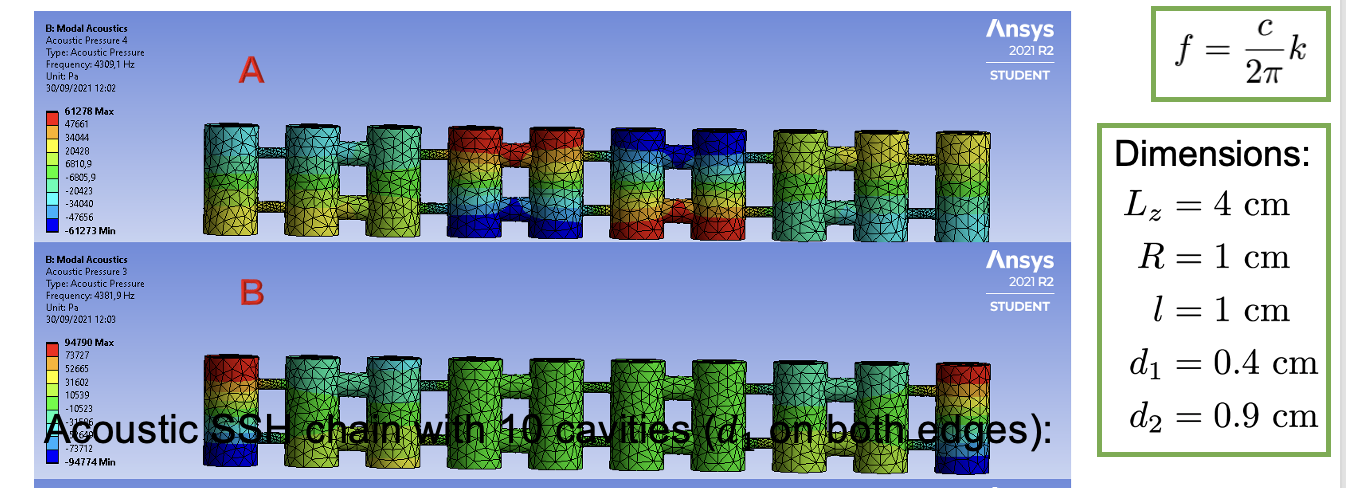

The SSH chain model is defined by the alternating thickness of the channels

In [52]:
raio = 1;
espessura1 = 1.;
espessura2 = .8;
altura = 10;
largura = 2 raio;

separacao = 1; (*2+speracao*)
sites = 12; (*sites+2*)

-Graphics-
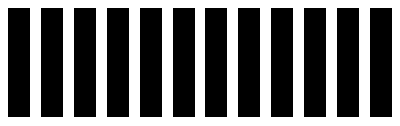

In [59]:
boundary = Show[
  Table[Graphics[{Black, 
     Rectangle[{i, 0} + {-largura/2, -altura/2}, {i, 0} + {largura/2, 
        altura/2}]}], {i, 0, (sites-1)*(separacao+2*raio), separacao+2*raio}],ImageSize->300]

In [60]:
boundary = Show[
  Table[If[
  EvenQ[i/(separacao+2*raio)], 
    Graphics[{Red, 
      Rectangle[{i, 0} + {0, -espessura1/2}, {i, 
         0} + {separacao+2*raio, espessura1/2}]}], 
    Graphics[{, 
      Rectangle[{i, 0} + {0, -espessura2/2}, {i, 
         0} + {separacao+2*raio, espessura2/2}]}]], 
         {i, 0, (sites - 2)*(separacao+2*raio), separacao+2*raio}], ImageSize -> 300]

Syntax::com: Warning: comma encountered with no adjacent expression. The expression will be treated as Null. .


Syntax::com: Warning: comma encountered with no adjacent expression. The expression will be treated as Null. .


Syntax::com: Warning: comma encountered with no adjacent expression. The expression will be treated as Null. .


-Graphics-

Syntax::com: Warning: comma encountered with no adjacent expression. The expression will be treated as Null. .


Syntax::com: Warning: comma encountered with no adjacent expression. The expression will be treated as Null. .


Syntax::com: Warning: comma encountered with no adjacent expression. The expression will be treated as Null. .


Syntax::com: Warning: comma encountered with no adjacent expression. The expression will be treated as Null. .


Syntax::com: Warning: comma encountered with no adjacent expression. The expression will be treated as Null. .


Syntax::com: Warning: comma encountered with no adjacent expression. The expression will be treated as Null. .


-Graphics-
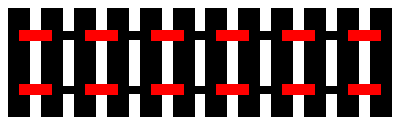

In [61]:
boundary = Show[
Table[Graphics[{Black, 
     Rectangle[{i, 0} + {-largura/2, -altura/2}, {i, 0} + {largura/2, 
        altura/2}]}], {i, 0, (sites-1)*(separacao+2*raio), separacao+2*raio}],
  Table[If[
  EvenQ[i/(separacao+2*raio)], 
    Graphics[{Red, 
      Rectangle[{i, 0} + {0, -espessura1/2- altura/4}, {i, 
         0} + {separacao+2*raio, espessura1/2- altura/4}]}], 
    Graphics[{, 
      Rectangle[{i, 0} + {0, -espessura2/2- altura/4}, {i, 
         0} + {separacao+2*raio, espessura2/2- altura/4}]}]], 
         {i, 0, (sites - 2)*(separacao+2*raio), separacao+2*raio}],
          Table[If[
  EvenQ[i/(separacao+2*raio)], 
    Graphics[{Red, 
      Rectangle[{i, 0} + {0, -espessura1/2+ altura/4}, {i, 
         0} + {separacao+2*raio, espessura1/2+ altura/4}]}], 
    Graphics[{, 
      Rectangle[{i, 0} + {0, -espessura2/2+ altura/4}, {i, 
         0} + {separacao+2*raio, espessura2/2+ altura/4}]}]], 
         {i, 0, (sites - 2)*(separacao+2*raio), separacao+2*raio}],
         ImageSize -> 300]

In [62]:
bdr = BoundaryDiscretizeGraphics[boundary, 
  MaxCellMeasure -> {"Area" -> 0.01}, AccuracyGoal -> 20, 
  PrecisionGoal -> 20, 
  MeshCellStyle -> {{1, All} -> Red, {0, All} -> Black}, 
  ImageSize -> 1000];

In [63]:
{vals, funs} = 
  NDEigensystem[{-Laplacian[u[x, y], {x, y}], 
    DirichletCondition[u[x, y] == 0, True]}, 
   u[x, y], {x, y} \[Element] bdr, sites-2, 
   Method -> {"PDEDiscretization" -> {"FiniteElement", 
       "MeshOptions" -> {"MaxCellMeasure" -> 0.01}}}];


-Graphics-
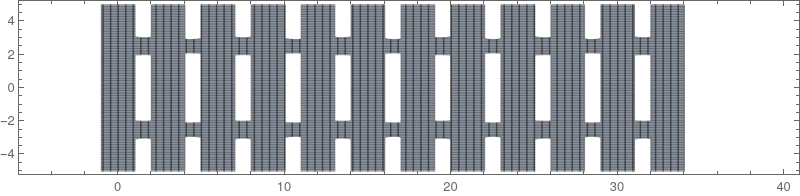

In [64]:
RegionPlot[{x, y} \[Element] bdr, {x, -5, 40}, {y, -5, 5}, 
 PlotPoints -> 100, Mesh -> All, MaxRecursion -> 0, 
 AspectRatio -> Automatic,ImageSize->600]

-Graphics-
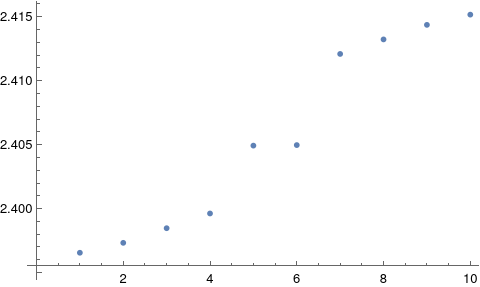

In [65]:
vals;
ListPlot[vals]

{-Graphics3D-, -Graphics3D-, -Graphics3D-, -Graphics3D-, -Graphics3D-, -Graphics3D-, 
 
>   -Graphics3D-, -Graphics3D-, -Graphics3D-, -Graphics3D-}
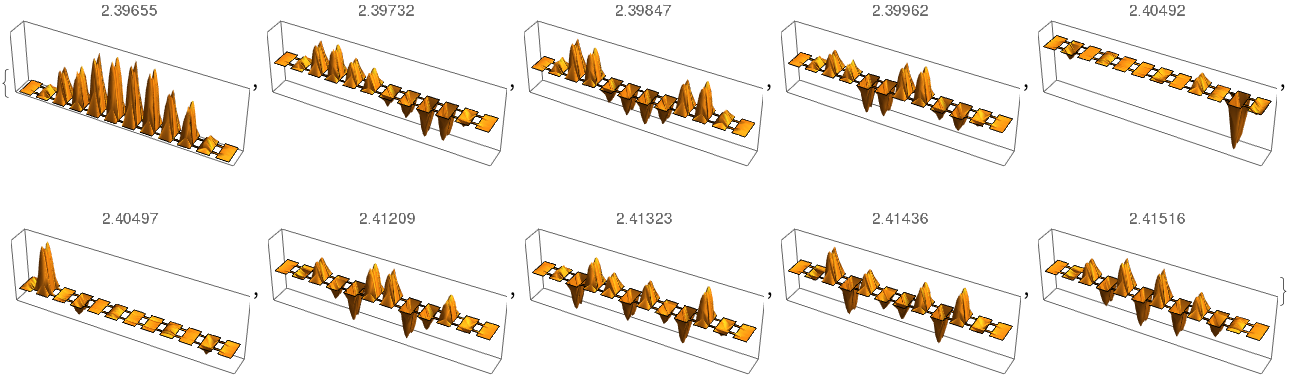

In [67]:
Table[Plot3D[funs[[i]], {x, y} \[Element] bdr, PlotRange -> All, 
  PlotLabel -> vals[[i]], PlotTheme -> "Minimal", 
  BoxRatios -> {10, 1, 3}], {i, Length[vals]}]

{harmonico  1, energy= 2.39655, -Graphics-}
{harmonico  2, energy= 2.39732, -Graphics-}
{harmonico  3, energy= 2.39847, -Graphics-}
{harmonico  4, energy= 2.39962, -Graphics-}
{harmonico  5, energy= 2.40492, -Graphics-}
{harmonico  6, energy= 2.40497, -Graphics-}
{harmonico  7, energy= 2.41209, -Graphics-}
{harmonico  8, energy= 2.41323, -Graphics-}
{harmonico  9, energy= 2.41436, -Graphics-}
{harmonico  10, energy= 2.41516, -Graphics-}
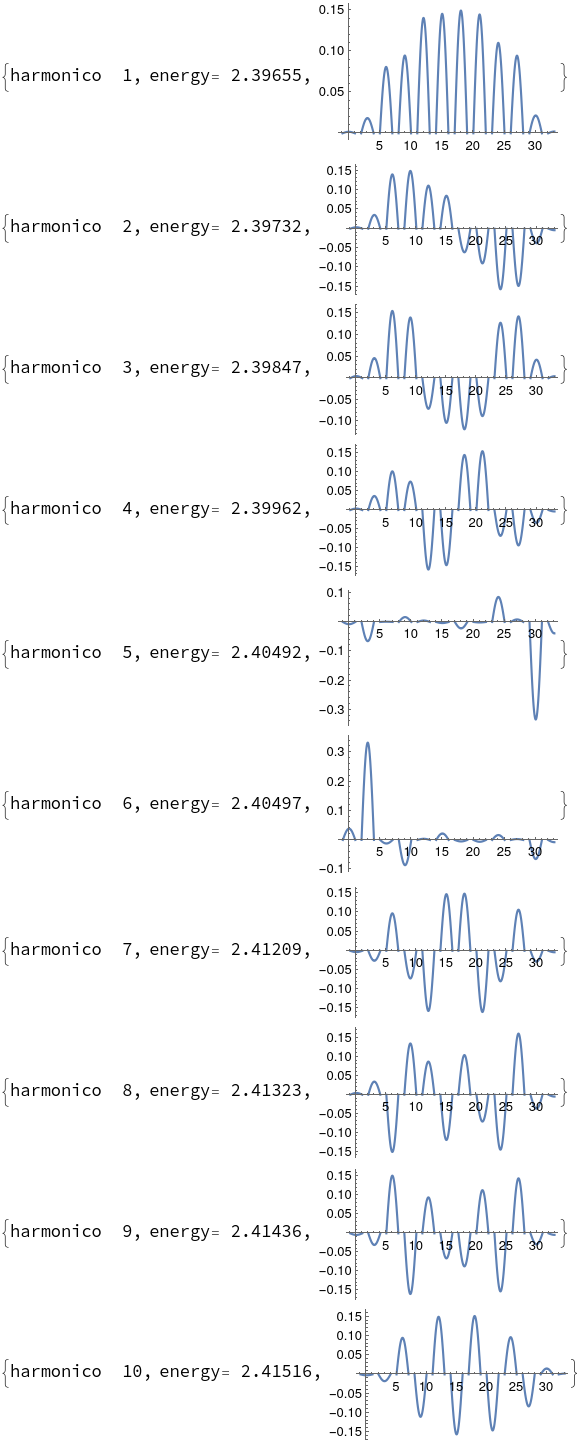

In [68]:
Column[{Table["harmonico  "<> ToString[i],{i,1,Length[vals]}],
Table["energy= "<> ToString[vals[[i]]],{i,1,Length[vals]}],
Table[
Plot[funs[[i]]/.{x->xvalue,y->0},
{xvalue,-raio,(sites-1)*(separacao+2*raio)},PlotRange->All],{i,1,Length[vals]}]}//Transpose]

### Discussion

We can check that there are 2 edge states in the lattice, in the 5th and 6th harmonic and see that the eigenvalues have the same behaviour as Anselmo's seminar

The visualization shows qualitatively a standing wave assuming acoustically rigid walls. A large amplitude corresponds to a large change in pressure and thus a large acoustic volume.